In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.datasets import make_blobs

np.random.seed(42)
X, _ = make_blobs(n_samples=20, centers=3, cluster_std=1.2, random_state=42)

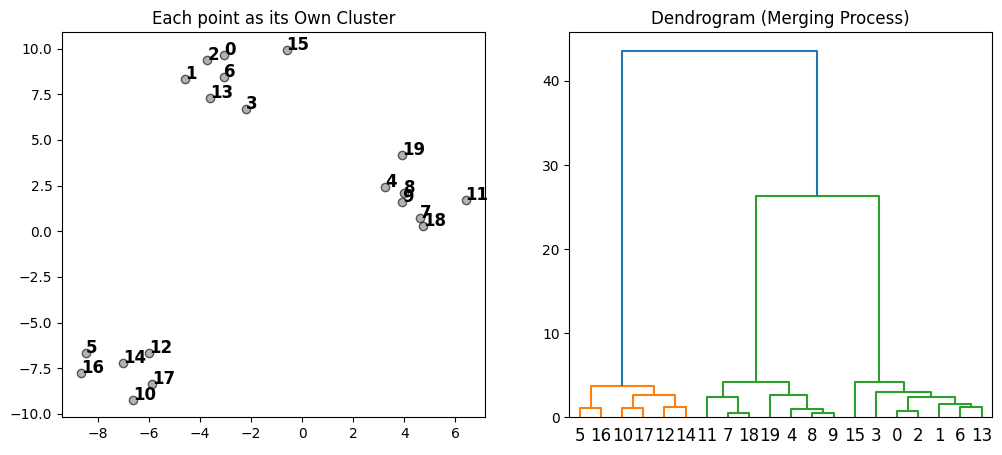

In [6]:
linkage_matrix = linkage(X, method='ward')

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i, txt in enumerate(range(len(X))):
    axes[0].annotate(txt, (X[i, 0], X[i, 1]), fontsize=12, color='black', weight='bold')
axes[0].scatter(X[:, 0], X[:, 1], c='gray', edgecolors='k', alpha=0.6)
axes[0].set_title('Each point as its Own Cluster')

dendrogram(linkage_matrix, labels=np.arange(len(X)), ax=axes[1])
axes[1].set_title("Dendrogram (Merging Process)")
plt.savefig("./figures/dendogram.jpg")
plt.show()

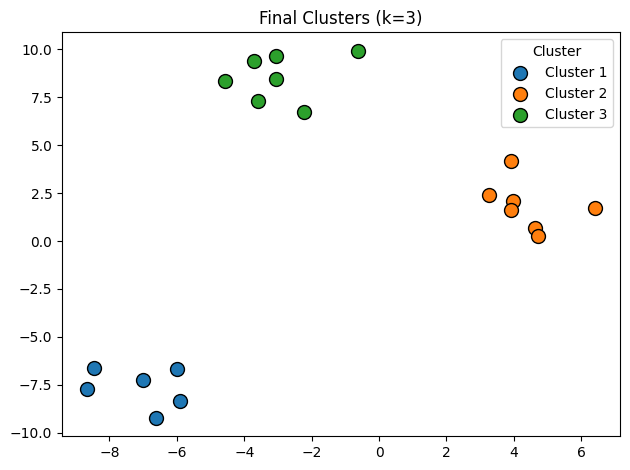

Hierarchical Clustering completed successfully!
Cluster assignments: [3 3 3 3 2 1 3 2 2 2 1 2 1 3 1 3 1 1 2 2]


In [7]:
clusters = fcluster(linkage_matrix, t=3, criterion='maxclust')  # Cut the dendrogram at 3 clusters

color_map = plt.cm.tab10
for cluster_num in np.unique(clusters):
    cluster_mask = clusters == cluster_num
    plt.scatter(X[cluster_mask, 0], X[cluster_mask, 1], 
                      color=color_map(cluster_num-1), edgecolor='k', s=100, 
                      label=f'Cluster {cluster_num}')

plt.title("Final Clusters (k=3)")
plt.legend(title='Cluster')

plt.tight_layout()
plt.savefig("./figures/hirarchical.jpg")
plt.show()

print("Hierarchical Clustering completed successfully!")
print(f"Cluster assignments: {clusters}")